In [9]:
import mediapipe as mp
import numpy as np
import cv2

def create_input(image, max_num_hands = 1, min_detection_confidence = 0.5) :

  # Load the image and convert to RGB
 # image = cv2.imread(image_path)
 # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  height, width, _ = image.shape # Save image dimensions
  # Create a zero-padded version of the image
  image_padded = np.zeros((height * 3, width * 3, 3))
  image_padded[height:2*height, width:2*width, :] = image

  # Initialize MediaPipe Hands object
  mp_hands = mp.solutions.hands.Hands(static_image_mode = True, # Can be changed to False if we do videos
                                      max_num_hands = max_num_hands,
                                      min_detection_confidence = min_detection_confidence)

  # Process the image to detect hands
  results = mp_hands.process(image)

  # Check if hands are detected
  if results.multi_hand_landmarks :
    x, y = [], [] # Store list of (x, y) coordinates
    for landmark in results.multi_hand_landmarks[0].landmark :
      x.append(int(landmark.x * width))
      y.append(int(landmark.y * height))
  else :
    print('No hands detected ...')
    return image, None, None, None, None, None

  # Release resources
  mp_hands.close()

  # Create box around the points with 2.5% extension
  x_min, x_max = int(min(x) - 2.5/100 * width),  int(max(x) + 2.5/100 * width)
  y_min, y_max = int(min(y) - 2.5/100 * height), int(max(y) + 2.5/100 * height)

  # Get box dimensions
  dx, dy = x_max - x_min, y_max - y_min
  diff = dy - dx

  # Extend dimension of smaller side of box to form a square
  if diff > 0 : # Height > Width
    if diff % 2 == 0 :
      x_min -= np.abs(diff) // 2
      x_max += np.abs(diff) // 2
    else :
      x_min -= (np.abs(diff) - 1) // 2
      x_max += (np.abs(diff) + 1) // 2
  elif diff < 0 : # Width > Height
    if diff % 2 == 0 :
      y_min -= np.abs(diff) // 2
      y_max += np.abs(diff) // 2
    else :
      y_min -= (np.abs(diff) - 1) // 2
      y_max += (np.abs(diff) + 1) // 2

  # Select subset of image
  hand = image_padded[height+y_min:height+y_max, width+x_min:width+x_max, :]
  hand_downsampled = np.array(cv2.resize(hand, (28, 28), interpolation = cv2.INTER_AREA).tolist())

  return hand_downsampled

In [39]:
image = cv2.imread('/Users/martinbogaert/Desktop/hodlers/IMG_5857.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

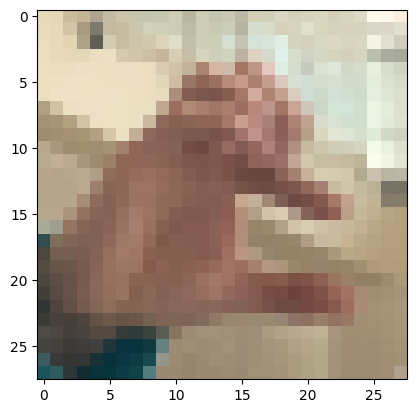

In [40]:
import matplotlib.pyplot as plt

hand = create_input(image, max_num_hands = 1, min_detection_confidence = 0.1)
plt.imshow(hand / hand.max())

In [26]:
import numpy as np

In [2]:
from moviepy.editor import VideoFileClip

# Load the video file
video_path = "/Users/martinbogaert/Desktop/hodlers/Movie on 06-03-2024 at 14.37.mp4"
video_clip = VideoFileClip(video_path)

# Get information about the video
duration = video_clip.duration
fps = video_clip.fps
width = video_clip.size[0]
height = video_clip.size[1]

# Print some information about the video
print("Duration:", duration)
print("FPS:", fps)
print("Width:", width)
print("Height:", height)

# Iterate through each frame and do something with it
for frame in video_clip.iter_frames():
    # Process each frame (example: print its dimensions)
    print("Frame dimensions:", frame.shape)

# Close the video clip
video_clip.close()

Duration: 4.85
FPS: 30.0
Width: 1620
Height: 1080
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3)
Frame dimensions: (1080, 1620, 3

In [5]:
for frame in video_clip.iter_frames() :
    break

AttributeError: 'NoneType' object has no attribute 'get_frame'

In [35]:
video_path = "/Users/martinbogaert/Desktop/hodlers/Movie on 06-03-2024 at 14.37.mp4"
video_clip = VideoFileClip(video_path)

In [36]:
frames = [frame for frame in video_clip.iter_frames()]
vid = np.array(frames)

In [45]:
import mediapipe as mp
import numpy as np
import cv2

In [75]:
# Initialize MediaPipe Hands object
mp_hands = mp.solutions.hands.Hands(static_image_mode = False, # Can be changed to False if we do videos
                                    max_num_hands = 1,
                                    min_detection_confidence = 0.1)

_, height, width, _ = vid.shape # Save frames dimensions

for i, frame in enumerate(vid) :

    # Process the image to detect hands
    results = mp_hands.process(frame)

    # Create a zero-padded version of the image
    image_padded = np.zeros((height * 3, width * 3, 3))
    image_padded[height:2*height, width:2*width, :] = frame

    # Check if hands are detected
    if results.multi_hand_landmarks :
        x, y = [], [] # Store list of (x, y) coordinates
        for landmark in results.multi_hand_landmarks[0].landmark :
            x.append(int(landmark.x * width))
            y.append(int(landmark.y * height))

        # Create box around the points with 2.5% extension
        x_min, x_max = int(min(x) - 2.5/100 * width),  int(max(x) + 2.5/100 * width)
        y_min, y_max = int(min(y) - 2.5/100 * height), int(max(y) + 2.5/100 * height)

        # Get box dimensions
        dx, dy = x_max - x_min, y_max - y_min
        diff = dy - dx

        # Extend dimension of smaller side of box to form a square
        if diff > 0 : # Height > Width
            if diff % 2 == 0 :
                x_min -= np.abs(diff) // 2
                x_max += np.abs(diff) // 2
            else :
                x_min -= (np.abs(diff) - 1) // 2
                x_max += (np.abs(diff) + 1) // 2
        elif diff < 0 : # Width > Height
            if diff % 2 == 0 :
                y_min -= np.abs(diff) // 2
                y_max += np.abs(diff) // 2
            else :
                y_min -= (np.abs(diff) - 1) // 2
                y_max += (np.abs(diff) + 1) // 2

        # Select subset of image
        hand = image_padded[height+y_min:height+y_max, width+x_min:width+x_max, :]
        hand = hand / 255.
        hand_downsampled = np.array(cv2.resize(hand, (28, 28), interpolation = cv2.INTER_AREA).tolist())

        _, ax = plt.subplots(1, 3)
        ax[0].imshow(frame)
        ax[0].plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], c = 'red', linewidth = 3)
        ax[0].set_title(f'Hands :  {results.multi_hand_landmarks is not None}', size = 10)
        ax[0].set_xlim([-100, 1720]); ax[0].set_ylim([1100, -20])
        ax[0].scatter(x, y, c = 'red', s = 5); ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].axis('off')
        ax[1].imshow(hand); ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].axis('off')
        ax[2].imshow(hand_downsampled); ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].axis('off')

    else :
        print('No hands detected ...')
        _, ax = plt.subplots(1, 3)
        ax[0].imshow(frame); ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].axis('off')
        ax[0].set_xlim([-100, 1720]); ax[0].set_ylim([1100, -20])
        ax[0].set_title(f'Hands :  {results.multi_hand_landmarks is not None}', size = 10)
        ax[1].imshow(np.zeros((1, 1)), cmap = 'Greys', vmin = -1, vmax = 0); ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].axis('off')
        ax[2].imshow(np.zeros((1, 1)), cmap = 'Greys', vmin = -1, vmax = 0); ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'movie_detection_frames/frame_{str(i).zfill(5)}.jpg', dpi = 200, bbox_inches = 'tight')
    plt.close()

# Release resources
mp_hands.close()

No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands detected ...
No hands d

In [78]:
import os
import imageio

# List the PNG files
images = [os.path.join('movie_detection_frames', img) for img in sorted(os.listdir('movie_detection_frames'))]

# Create the MP4 movie
with imageio.get_writer('movie.mp4', fps = 15) as writer:
    for image in images:
        frame = imageio.imread(image)
        writer.append_data(frame)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1260, 426) to (1264, 432) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x7fa650048000] Warning: data is not aligned! This can lead to a speed loss
